# **House Price Prediction**

In [1]:
# importing important libraries for model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read CSV File
df = pd.read_csv('/kaggle/input/house-price-prediction-linear-regression/raw_house_prices.csv')
df

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
0,4,2,2,Urban,4526,6,1,791442.190356
1,5,4,1,Rural,4679,3,0,915653.402909
2,3,4,2,Urban,2182,22,0,501578.036147
3,5,1,2,Suburban,4463,11,1,762375.219812
4,5,2,1,Suburban,1433,15,1,521820.710663
...,...,...,...,...,...,...,...,...
495,1,2,1,Rural,2996,22,0,406441.256676
496,3,3,1,Urban,2225,24,0,460897.138241
497,1,4,1,Suburban,2189,13,1,417818.488330
498,1,3,1,Urban,3767,12,0,578887.797914


In [3]:
# Print First Five Rows
df.head()

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
0,4,2,2,Urban,4526,6,1,791442.190356
1,5,4,1,Rural,4679,3,0,915653.402909
2,3,4,2,Urban,2182,22,0,501578.036147
3,5,1,2,Suburban,4463,11,1,762375.219812
4,5,2,1,Suburban,1433,15,1,521820.710663


In [4]:
# Print Last Five Rows 
df.tail()

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
495,1,2,1,Rural,2996,22,0,406441.256676
496,3,3,1,Urban,2225,24,0,460897.138241
497,1,4,1,Suburban,2189,13,1,417818.488330
498,1,3,1,Urban,3767,12,0,578887.797914
499,1,2,2,Urban,4906,26,0,652360.135954


In [5]:
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Display the dataset
df

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
0,4,2,2,0,4526,6,1,791442.190356
1,5,4,1,1,4679,3,0,915653.402909
2,3,4,2,0,2182,22,0,501578.036147
3,5,1,2,2,4463,11,1,762375.219812
4,5,2,1,2,1433,15,1,521820.710663
...,...,...,...,...,...,...,...,...
495,1,2,1,1,2996,22,0,406441.256676
496,3,3,1,0,2225,24,0,460897.138241
497,1,4,1,2,2189,13,1,417818.488330
498,1,3,1,0,3767,12,0,578887.797914


In [6]:
# Check Data is null or not
df.isnull().sum()

Rooms          0
Bathrooms      0
Floors         0
Locality       0
Area (sqft)    0
Age (years)    0
Garage         0
Price          0
dtype: int64

In [7]:
# Print Columns Name
df.columns

Index(['Rooms', 'Bathrooms', 'Floors', 'Locality', 'Area (sqft)',
       'Age (years)', 'Garage', 'Price'],
      dtype='object')

In [8]:
# Print Shape
df.shape

(500, 8)

In [9]:
# Print Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        500 non-null    int64  
 1   Bathrooms    500 non-null    int64  
 2   Floors       500 non-null    int64  
 3   Locality     500 non-null    int64  
 4   Area (sqft)  500 non-null    int64  
 5   Age (years)  500 non-null    int64  
 6   Garage       500 non-null    int64  
 7   Price        500 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 31.4 KB


In [10]:
# Description of dataset.
df.describe()

,Rooms,Bathrooms,Floors,Locality,Area (sqft),Age (years),Garage,Price
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.970000,2.39400,1.484000,0.980000,2734.282000,15.210000,0.516000,559380.184582
std,1.425891,1.11591,0.500244,0.825204,1309.631158,8.316503,0.500244,157841.103495
min,1.000000,1.00000,1.000000,0.000000,501.000000,1.000000,0.000000,176541.684423
25%,2.000000,1.00000,1.000000,0.000000,1541.000000,8.000000,0.000000,446725.721340
50%,3.000000,2.00000,1.000000,1.000000,2754.000000,15.000000,1.000000,556138.342222
75%,4.000000,3.00000,2.000000,2.000000,3881.250000,22.000000,1.000000,671339.774456
max,5.000000,4.00000,2.000000,2.000000,4976.000000,29.000000,1.000000,971124.868891


In [11]:
y_train = df['Price'].values
x_train = df.drop(columns = ['Price']).values

In [12]:
print("Data type of X_train:", x_train.dtype)
print("Data type of y_train:", y_train.dtype)

Data type of X_train: int64
Data type of y_train: float64


/tmp/ipykernel_399/4001252405.py:20: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


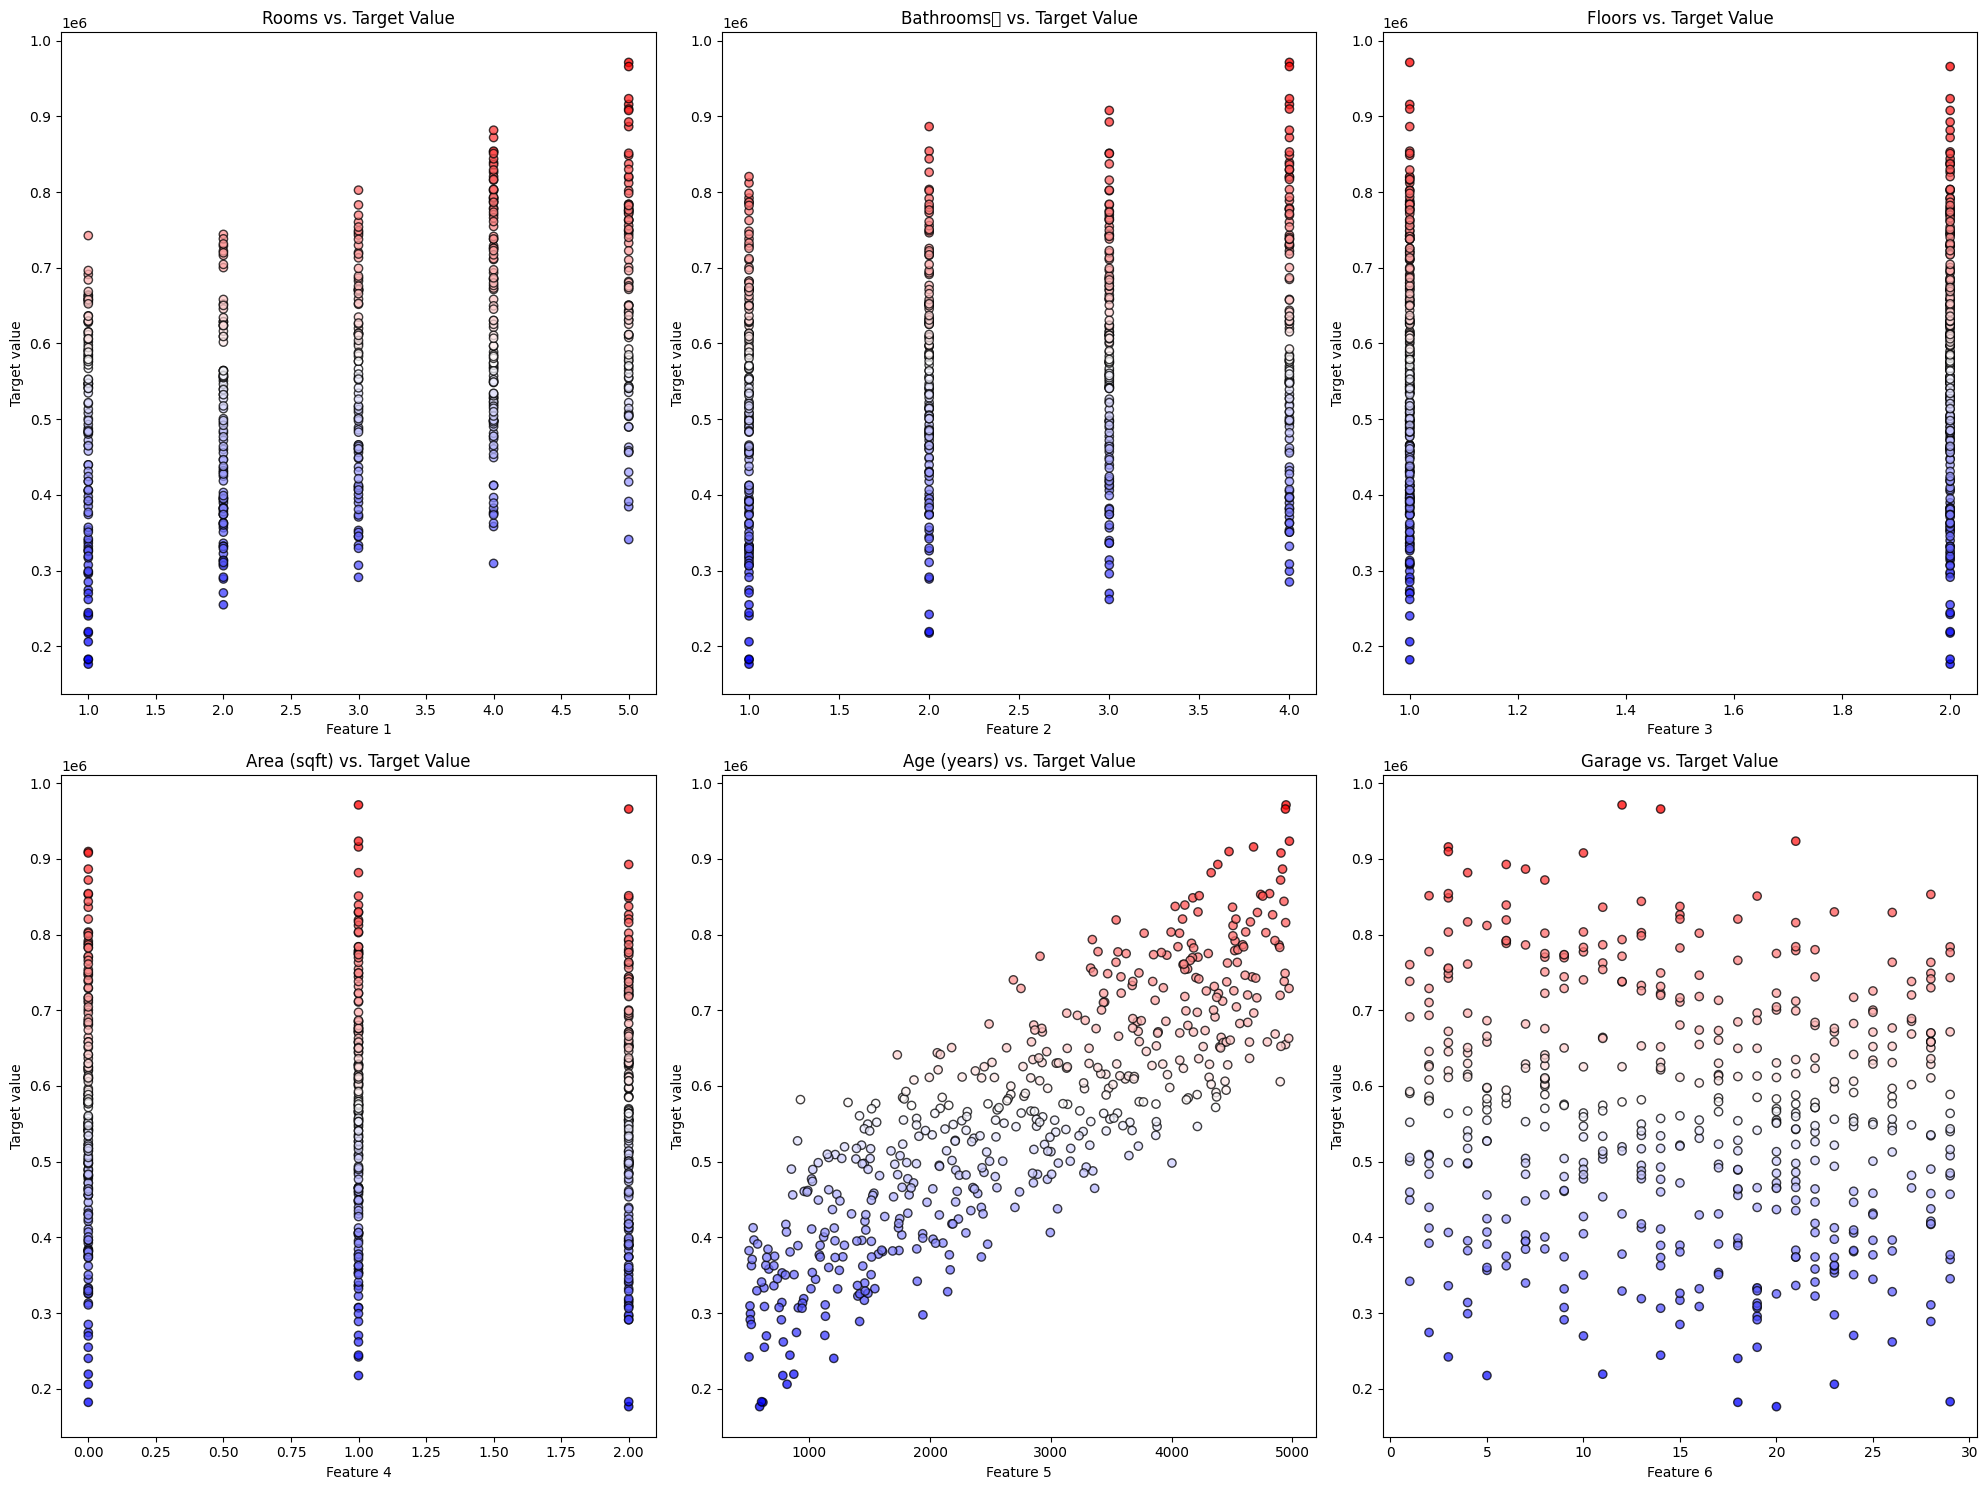

In [13]:
# Data visulation
# plotting each features against the output variable y
y_train = y_train.reshape(-1)

# list of feature names
features = ["Rooms", "Bathrooms	", "Floors", "Area (sqft)", "Age (years)", "Garage"]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Plot each feature against the binary target
for k in range(6):  # We only have 8 subplots, adjust as necessary
    i = k // 3  # Row index
    j = k % 3   # Column index
    axes[i, j].scatter(x_train[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75, edgecolor='k')
    axes[i, j].set_title(f'{features[k]} vs. Target Value')
    axes[i, j].set_xlabel(f'Feature {k+1}')
    axes[i, j].set_ylabel('Target value')
# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 2)

In [15]:
# view the training variable
print("Elements in X_train are:\n", x_train[:13])
print("Type of X_train:",type(x_train))

print("\n Elements in y_train are:\n", y_train[:13])
print("Type of y_train:",type(y_train))

Elements in X_train are:
 [[   1    1    1    1 4328    8    1]
 [   1    1    2    2 4858   27    1]
 [   4    1    2    2 4589   11    0]
 [   4    2    2    2 4837   15    1]
 [   3    4    2    0 3932   28    0]
 [   2    3    1    0 1975   24    0]
 [   5    2    2    2 2101   19    1]
 [   2    4    1    2 4348   25    1]
 [   2    3    2    0 1864   15    1]
 [   2    3    1    1 2338   21    0]
 [   3    2    2    1  775   23    1]
 [   1    2    1    0 3348   13    0]
 [   3    3    1    1 1769   21    1]]
Type of X_train: <class 'numpy.ndarray'>

 Elements in y_train are:
 [602167.46321827 668587.07227955 786454.56519889 826061.74869994
 729686.62427871 446379.39839171 584935.50273315 700184.4745343
 471934.49527745 435415.32457269 353118.64186516 487810.28222421
 466134.85201408]
Type of y_train: <class 'numpy.ndarray'>


In [16]:
# view the training variable
print("Elements in X_train are:\n", x_test[:13])
print("Type of X_train:",type(x_test))

print("\n Elements in y_train are:\n", y_test[:13])
print("Type of y_train:",type(y_test))

Elements in X_train are:
 [[   5    1    2    0 1161   18    1]
 [   2    2    2    2 3791    2    1]
 [   1    3    2    2 2235    6    0]
 [   5    3    1    1 2925   23    1]
 [   1    1    2    0 2439   17    1]
 [   2    1    2    2 4406    9    1]
 [   5    4    1    1 4679    3    0]
 [   4    3    1    2 3064   20    0]
 [   3    1    1    0 1214   14    1]
 [   2    1    2    0 1235    9    1]
 [   3    1    2    2  736   29    1]
 [   2    3    2    1 3515   27    1]
 [   1    1    2    0 4214   26    1]]
Type of X_train: <class 'numpy.ndarray'>

 Elements in y_train are:
 [462958.72059773 645619.73813437 424272.9970963  676049.10304504
 431047.4178874  650223.90849626 915653.40290928 630480.7849259
 373482.57358923 332029.92828174 345411.80407356 601797.90336018
 546556.15359323]
Type of y_train: <class 'numpy.ndarray'>


In [17]:
# Check the dimensions of testing variables
print ('The shape of X_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))
print ('We have m = %d testing examples' % (len(y_test)))

The shape of X_test is: (125, 7)
The shape of y_test is: (125,)
We have m = 125 testing examples


In [18]:
from sklearn.linear_model import LinearRegression # Import Linerar Regression model

model = LinearRegression()

model.fit(x_train, y_train)

print("coef :",model.coef_)
print("intercept :",model.intercept_)

coef : [50329.73824546 26922.66197056 18190.70389887 -5103.69209514
   100.63084969 -2040.13152746 12649.91490666]
intercept : 72998.78386522713


In [19]:
from sklearn.metrics import mean_squared_error

predicted = model.predict(x_train)

# Calculate metrics
mse = mean_squared_error(y_train, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared Error: {rmse}")

Mean Squared Error: 578653306.0661862
Root mean Squared Error: 24055.21369820244


In [20]:
predicted = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared Error: {rmse}")

Mean Squared Error: 687044873.8943322
Root mean Squared Error: 26211.54085311148
